<a href="https://colab.research.google.com/github/Porman3211/CC14MOCNANGAN/blob/main/Feature_Engineering_%26_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


#Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

display(df.head())




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Part I - FEATURING ENGINEERING

print("=== Step 1: Inspect Raw Columns ===")
print("\nFirst 10 rows of SibSp and Parch:")
print(df[['SibSp', 'Parch']].head(10))

print("\nData types:")
print(df[['SibSp', 'Parch']].dtypes)

print("\nMissing values:")
print(df[['SibSp', 'Parch']].isnull().sum())

=== Step 1: Inspect Raw Columns ===

First 10 rows of SibSp and Parch:
   SibSp  Parch
0      1      0
1      1      0
2      0      0
3      1      0
4      0      0
5      0      0
6      0      0
7      3      1
8      0      2
9      1      0

Data types:
SibSp    int64
Parch    int64
dtype: object

Missing values:
SibSp    0
Parch    0
dtype: int64


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print("\n=== Step 2 & 3: New FamilySize Column ===")
print(df[['SibSp', 'Parch', 'FamilySize']].head(10))


=== Step 2: New FamilySize Column ===
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2


In [ ]:
print("\n=== Step 4: Interpretation ===")
print("* A value of 1 means the passenger is traveling alone.")
print("* A value greater than 1 means the passenger is traveling with one or more family members.")
print("* Larger family groups (4+) may show different survival behavior.")


=== Step 4: Interpretation ===
* A value of 1 means the passenger is traveling alone.
* A value greater than 1 means the passenger is traveling with one or more family members.
* Larger family groups (4+) may show different survival behavior.



=== Step 5: Exploratory Analysis ===

1. Frequency table for FamilySize:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


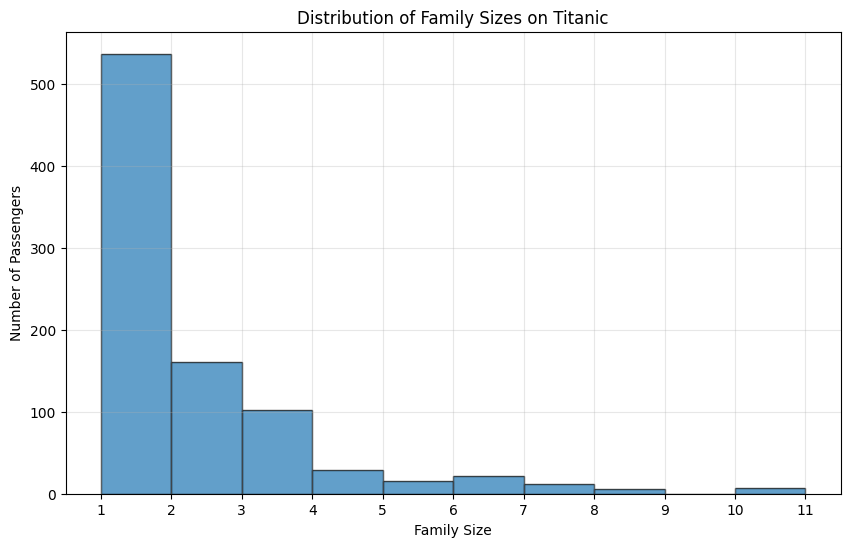


2. Survival Rate by Family Size:
FamilySize
1     30.35
2     55.28
3     57.84
4     72.41
5     20.00
6     13.64
7     33.33
8      0.00
11     0.00
Name: Survived, dtype: float64


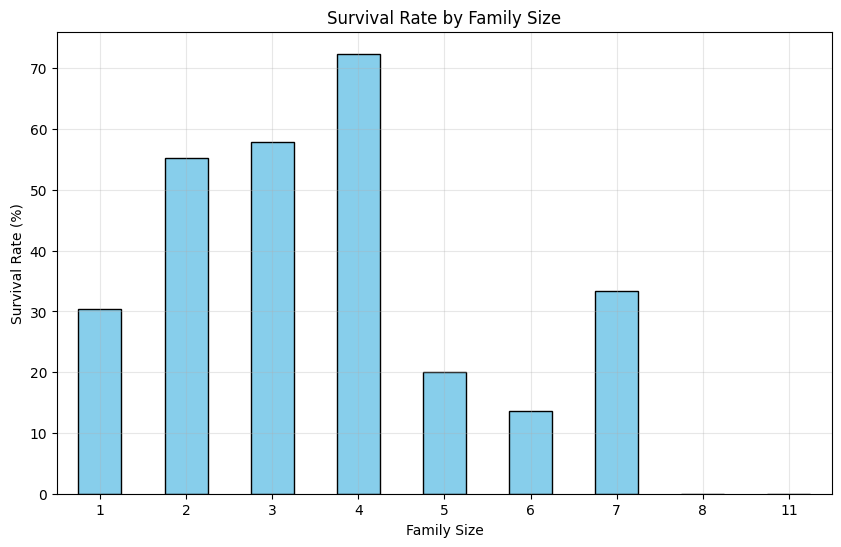


=== Observations ===
Passengers traveling alone (FamilySize=1) had a survival rate of 30.35 %
Small families (2-3 members) had better survival rates.
Very large families (7+ members) had very low survival rates.


In [ ]:
print("\n=== Step 5: Exploratory Analysis ===")

# Frequency table
print("\n1. Frequency table for FamilySize:")
freq_table = df['FamilySize'].value_counts().sort_index()
print(freq_table)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['FamilySize'], bins=range(1, 12), edgecolor='black', alpha=0.7)
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Family Sizes on Titanic')
plt.xticks(range(1, 12))
plt.grid(True, alpha=0.3)
plt.show()

# Comparison of Survived vs FamilySize
print("\n2. Survival Rate by Family Size:")
survival_by_family = df.groupby('FamilySize')['Survived'].mean() * 100
print(survival_by_family.round(2))

# Bar chart for survival rates
plt.figure(figsize=(10, 6))
survival_by_family.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Family Size')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== Observations ===")
print("Passengers traveling alone (FamilySize=1) had a survival rate of",
      round(survival_by_family[1], 2), "%")
print("Small families (2-3 members) had better survival rates.")
print("Very large families (7+ members) had very low survival rates.")

In [ ]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print("\n=== Step 6: IsAlone Feature ===")
print("\nFirst 10 rows with new IsAlone feature:")
print(df[['FamilySize', 'IsAlone']].head(10))

print("\nSurvival rate for alone vs with family:")
alone_survival = df.groupby('IsAlone')['Survived'].mean() * 100
print(alone_survival.round(2))

print("\n=== Summary ===")
print("Passengers traveling alone survived:", round(alone_survival[1], 2), "%")
print("Passengers traveling with family survived:", round(alone_survival[0], 2), "%")


=== Step 6: IsAlone Feature ===

First 10 rows with new IsAlone feature:
   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1
5           1        1
6           1        1
7           5        0
8           3        0
9           2        0

Survival rate for alone vs with family:
IsAlone
0    50.56
1    30.35
Name: Survived, dtype: float64

=== Summary ===
Passengers traveling alone survived: 30.35 %
Passengers traveling with family survived: 50.56 %


In [ ]:
#Part 2: Encoding the "Sex" Feature

print("=== Step 1: Inspect the 'Sex' Feature ===")
print("\nFirst 10 rows of Sex column:")
print(df['Sex'].head(10))

print("\nUnique values in Sex column:")
unique_values = df['Sex'].unique()
print(unique_values)

print("\nValue counts:")
print(df['Sex'].value_counts())

print("\nData type of Sex column:")
print(df['Sex'].dtype)

print("\nMissing values in Sex column:")
print(df['Sex'].isnull().sum())

=== Step 1: Inspect the 'Sex' Feature ===

First 10 rows of Sex column:
0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

Unique values in Sex column:
['male' 'female']

Value counts:
Sex
male      577
female    314
Name: count, dtype: int64

Data type of Sex column:
object

Missing values in Sex column:
0


In [ ]:
print("\n=== Step 2: Binary Label Encoding ===")
print("Encoding: male → 0, female → 1")

# Create a new column with binary encoding
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# Alternative method using .replace()
# df['Sex_encoded'] = df['Sex'].replace({'male': 0, 'female': 1})

print("\nAfter encoding - first 10 rows:")
print(df[['Sex', 'Sex_encoded']].head(10))


=== Step 2: Binary Label Encoding ===
Encoding: male → 0, female → 1

After encoding - first 10 rows:
      Sex  Sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0
5    male            0
6    male            0
7    male            0
8  female            1
9  female            1


In [ ]:
print("\n=== Step 3: Verify the Encoding ===")

print("Unique values after encoding:")
print(df['Sex'].unique())

print("\nSample of encoded data:")
df[['Sex', 'Survived']].head(10)


=== Step 3: Verify the Encoding ===
Unique values after encoding:
['male' 'female']

Sample of encoded data:


,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1
